In [1]:
pcran=scan('pcran', what="")
pember=scan('pember', what="")

Cdep = data.frame(name=pcran)
for (n in c("CD_up", "CD_dn", "CR_up", "CR_dn", 'C_au','C_mn')){
  x = read.csv(n,header = FALSE,sep = ';')
  x = x[!is.na(match(x[,1],pcran)),]
  Cdep[,paste(n, '', sep='')] = rep(0, length(pcran));
  sel = match(pcran, x[,1],nomatch=0);
  Cdep[sel>0,paste(n, '', sep='')] =  x[sel,2];
} 
summary(Cdep)

Edep = data.frame(name=pember)
for (n in c("ED_up_I", "ED_dn_I", "ER_up_I", "ER_dn_I",
            "ED_up_O", "ED_dn_O", "ER_up_O", "ER_dn_O", 
            'E_au','E_mn')){
  x = read.csv(n,header = FALSE,sep = ';')
   x = x[!is.na(match(x[,1],pember)),]
  Edep[,paste(n, '', sep='')] = rep(0, length(pember));
  sel = match(pember, x[,1],nomatch=0);
  Edep[sel>0,paste(n, '', sep='')] =  x [sel,2];
} 
summary(Edep)

          name           CD_up             CD_dn              CR_up      
 A3         :    1   Min.   :  0.000   Min.   :   0.000   Min.   :  0.0  
 ABC.RAP    :    1   1st Qu.:  1.000   1st Qu.:   0.000   1st Qu.:  0.0  
 ABCExtremes:    1   Median :  3.000   Median :   0.000   Median :136.0  
 ABCanalysis:    1   Mean   :  4.603   Mean   :   3.101   Mean   :172.7  
 ABCoptim   :    1   3rd Qu.:  6.000   3rd Qu.:   0.000   3rd Qu.:367.0  
 ABCp2      :    1   Max.   :118.000   Max.   :1642.000   Max.   :662.0  
 (Other)    :11062                                                       
     CR_dn             C_au              C_mn       
 Min.   :   0.0   Min.   :  0.000   Min.   : 0.000  
 1st Qu.:   0.0   1st Qu.:  0.000   1st Qu.: 0.000  
 Median :   0.0   Median :  2.000   Median : 1.000  
 Mean   : 170.9   Mean   :  8.949   Mean   : 3.824  
 3rd Qu.:   0.0   3rd Qu.:  7.000   3rd Qu.: 3.000  
 Max.   :6729.0   Max.   :583.000   Max.   :75.000  
                                     

                       name         ED_up_I          ED_dn_I        
 @abcum/ember-appupdate  :   1   Min.   : 0.000   Min.   :   0.000  
 @abcum/ember-contextmenu:   1   1st Qu.: 0.000   1st Qu.:   0.000  
 @abcum/ember-domain     :   1   Median : 1.000   Median :   0.000  
 @abcum/ember-editables  :   1   Mean   : 1.402   Mean   :   1.851  
 @abcum/ember-gridlist   :   1   3rd Qu.: 2.000   3rd Qu.:   0.000  
 @abcum/ember-helpers    :   1   Max.   :16.000   Max.   :3109.000  
 (Other)                 :3381                                      
    ER_up_I         ER_dn_I            ED_up_O         ED_dn_O        
 Min.   : 0.00   Min.   :   0.000   Min.   : 0.00   Min.   :  0.0000  
 1st Qu.: 0.00   1st Qu.:   0.000   1st Qu.: 0.00   1st Qu.:  0.0000  
 Median : 4.00   Median :   0.000   Median : 0.00   Median :  0.0000  
 Mean   : 3.89   Mean   :   5.207   Mean   : 1.21   Mean   :  0.4009  
 3rd Qu.: 5.00   3rd Qu.:   0.000   3rd Qu.: 1.00   3rd Qu.:  0.0000  
 Max.   :36.00   Max. 

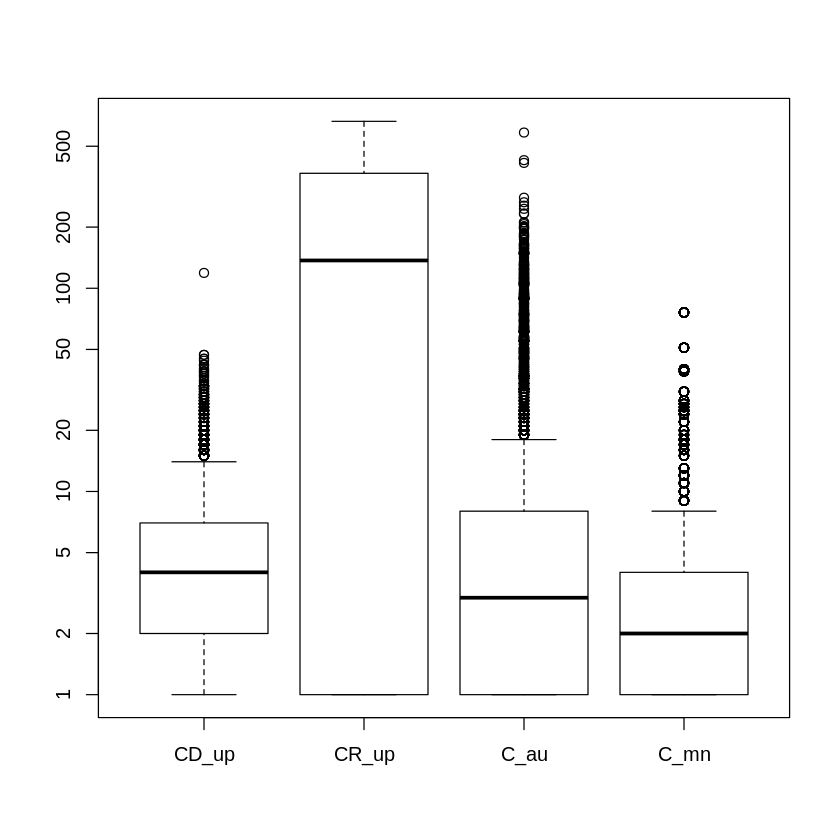

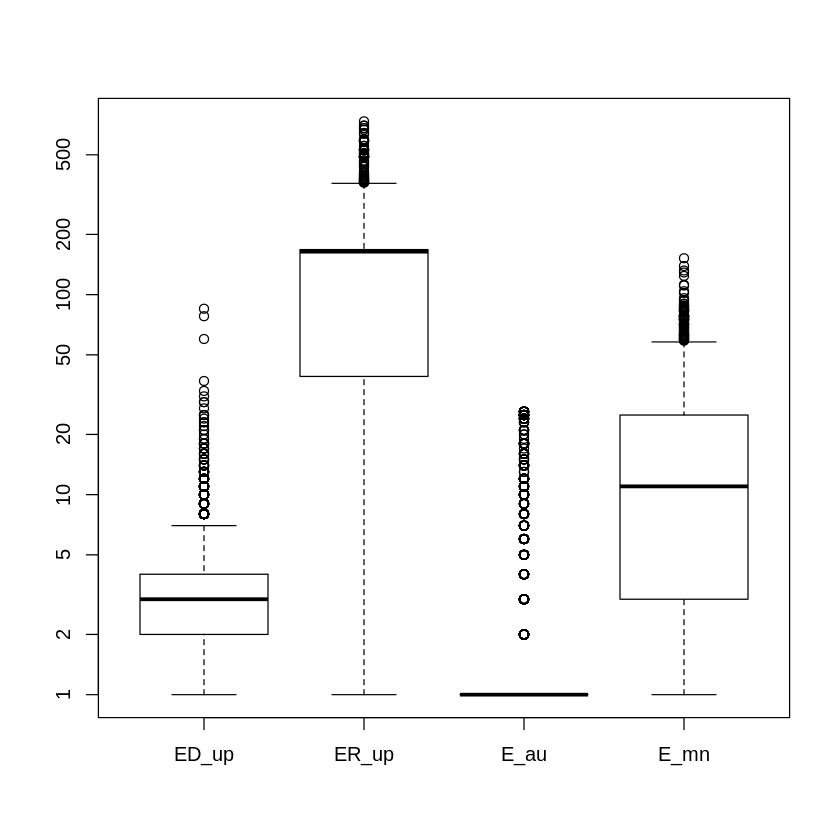

In [12]:
Edep$ED_up = Edep[,c("ED_up_I")]+Edep[,c("ED_up_O")]
Edep$ED_dn = Edep[,c("ED_dn_I")]+Edep[,c("ED_dn_O")]
Edep$ER_up = Edep[,c("ER_up_I")]+Edep[,c("ER_up_O")]
Edep$ER_dn = Edep[,c("ER_dn_I")]+Edep[,c("ER_dn_O")]

boxplot(Cdep[,c("CD_up","CR_up","C_au","C_mn")]+1,log="y")
boxplot(Edep[,c("ED_up","ER_up","E_au","E_mn")]+1,log="y")


CRAN has a median of three direct and 136 recursive upstream dependencies, while ember has one direct and 163 (recursive) upstream dependencies.

Author network links to a median of two packages in CRAN, but to zero in ember. 

The maintainer network links a median of nine other ember packages but only one in CRAN.

In [22]:
#what is the probability of at least one downstream dep?
round(c(mean(Edep[,"E_au"]>0),mean(Cdep[,"C_au"]>0), 
mean(Cdep[,"CD_dn"]>0), mean(Cdep[,"CR_dn"]>0),
mean(Edep[,"ED_dn_I"]>0),mean(Edep[,"ED_dn_O"]>0),
mean(Edep[,"ED_dn"]>0)
),2)

[1] 0.18 0.73 0.25 0.25 0.11 0.05 0.12

Author-induced in ember and downstream dependendency induced networks in both ecosystems are rare: 
only 25% of packages in CRAN and 12% in ember have any dependents. 

This means that for the purpose of studying how to structure information flows, only 25% of the packages in 
CRAN and 12% in ember could potentially break downstream (though all may affect end users).

In CRAN this fraction is much higher, hence it has to be reflected in different coordination practices.

Authors provide at least one link in only 18% of ember packages, but the social network is much tighter in
CRAN with authors provideing a link in 73% of packages.

This either indicates a very different collaboration structure or a bug/artifact of network construction (or both).


In [27]:
t.test(log(Cdep[,"CD_up"]+1), log(Edep[,"ED_up"]+1))
t.test(log(Cdep[,"CR_up"]+1), log(Edep[,"ER_up"]+1))


	Welch Two Sample t-test

data:  log(Cdep[, "CD_up"] + 1) and log(Edep[, "ED_up"] + 1)
t = 26.065, df = 6533.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.339252 0.394432
sample estimates:
mean of x mean of y 
 1.390983  1.024141 



	Welch Two Sample t-test

data:  log(Cdep[, "CR_up"] + 1) and log(Edep[, "ER_up"] + 1)
t = -14.166, df = 6975.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6959656 -0.5267595
sample estimates:
mean of x mean of y 
 3.408377  4.019739 


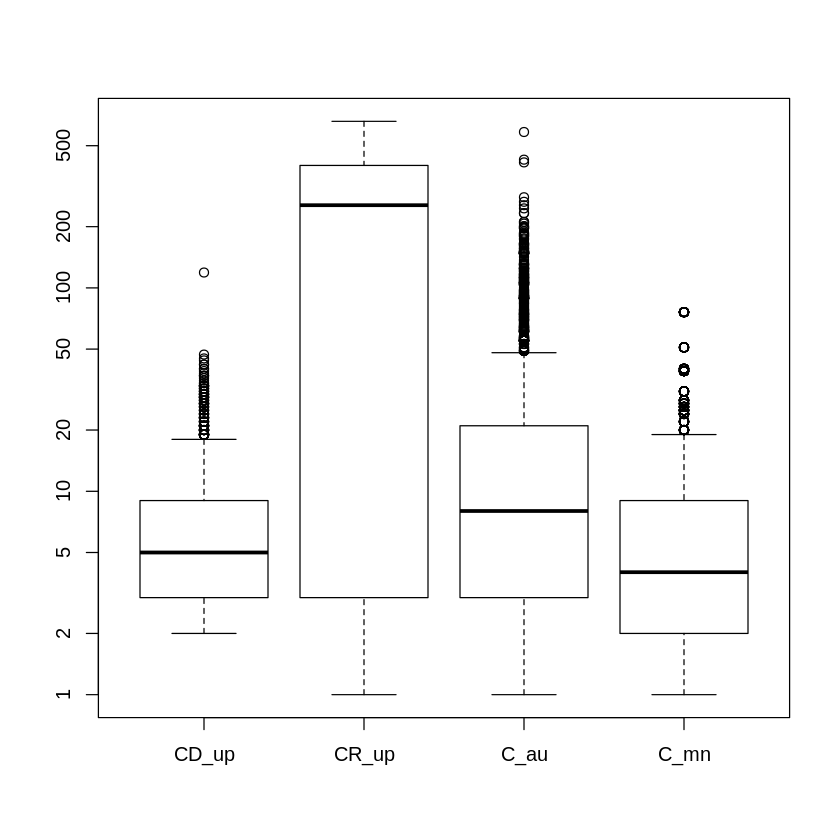

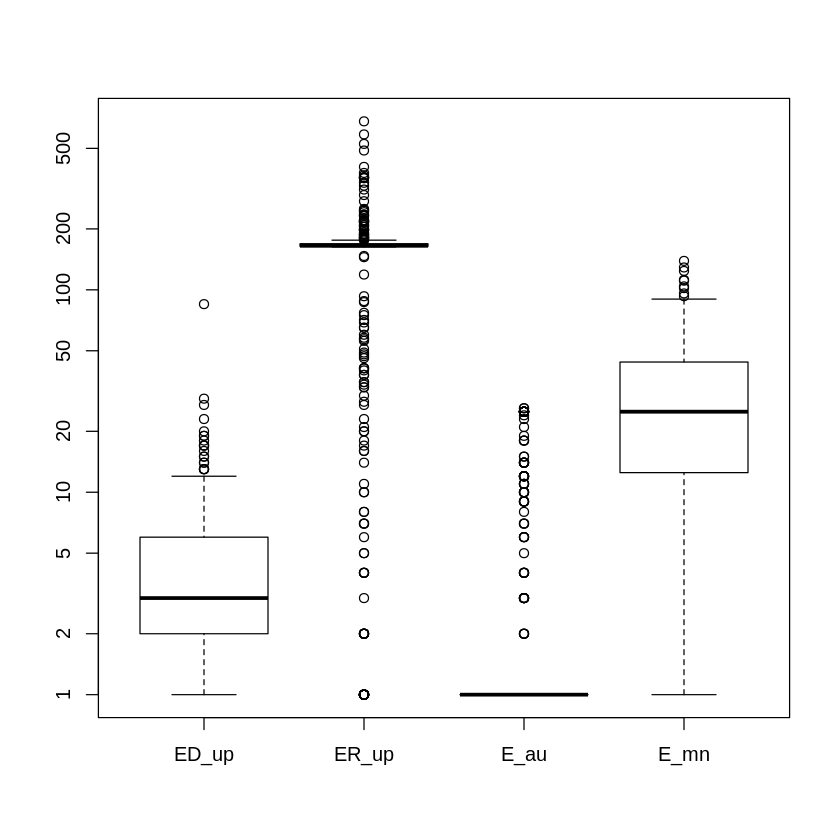

In [28]:
#lets look at "nontrivial" packages with at least one downstream dep
boxplot(Cdep[Cdep[,"CD_dn"]>0,c("CD_up","CR_up","C_au","C_mn")]+1,log="y")
boxplot(Edep[Edep[,"ED_dn"]>0,c("ED_up","ER_up","E_au","E_mn")]+1,log="y")


The important (with dependents) packages in ember have similar upstream dependencies (2->2D, 180-180R) but in CRAN they have more (3->4D and 120-300R)

The author- and maintainer-induced networks are also larger in CRAN (author: 2->9 and maintainer: 1->3). 

For Ember, the maintainer network also becomes much denser (10->20)

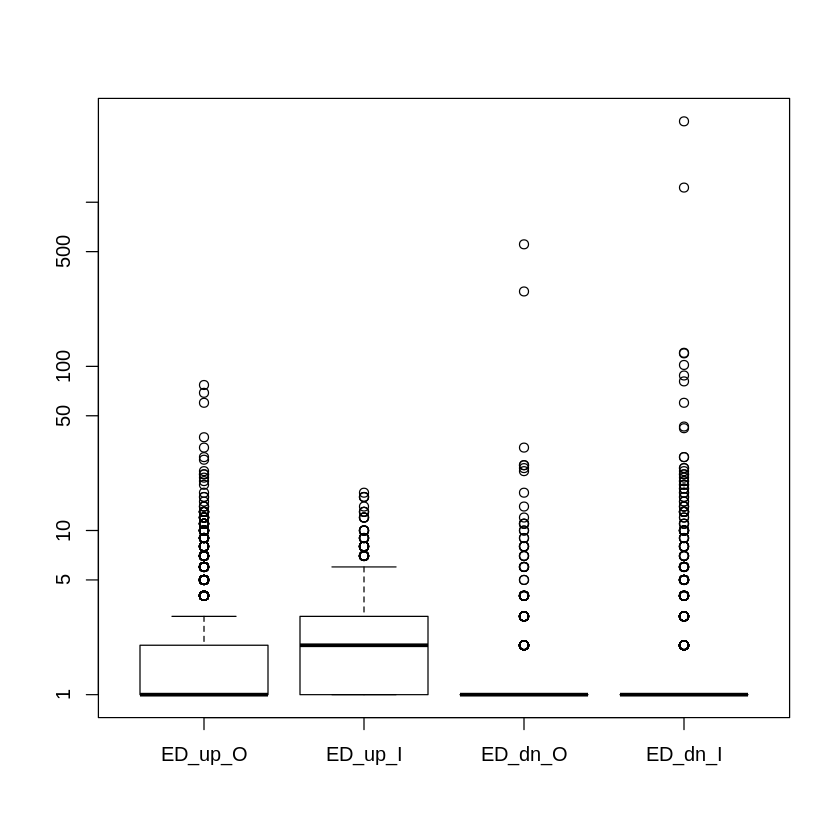

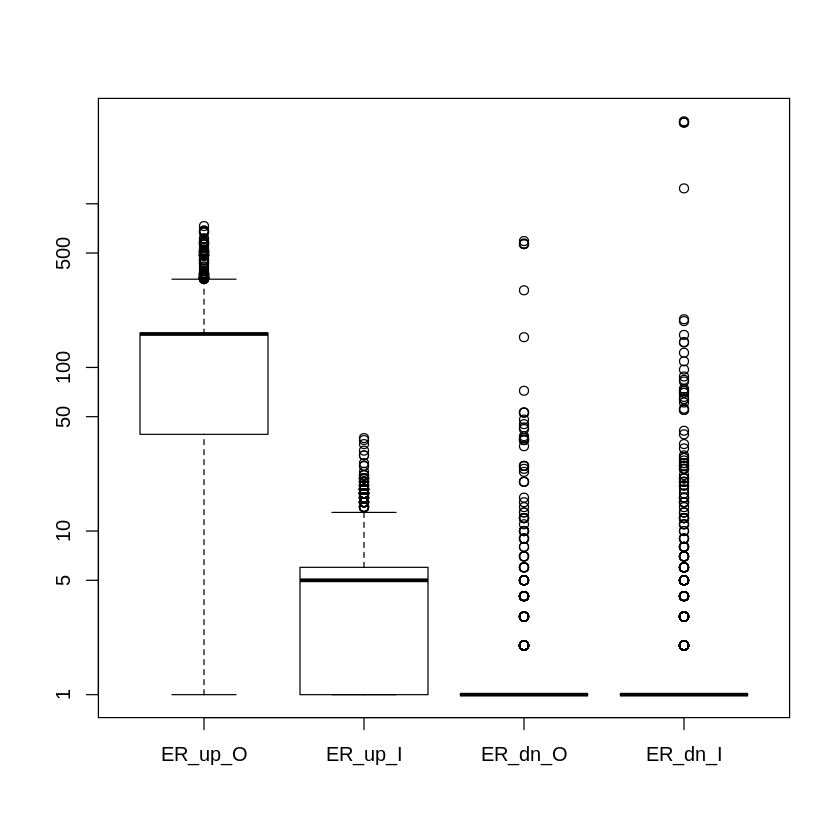

In [14]:
#investigating ember's internal vs external dependencies
boxplot(Edep[,c("ED_up_O","ED_up_I",
                "ED_dn_O","ED_dn_I")]+1,        
        log='y')
boxplot(Edep[,c("ER_up_O","ER_up_I",
                "ER_dn_O","ER_dn_I")]+1,        
        log='y')


The internal recursive dependencies are limited by the 4.5K total packages in ember, but direct internal dependencies are a bit more common (median of 1 vs 0), so it may be possible to estimate the ecosystem 
boundaries vai a suitable clustering. 